In [1]:
import numpy as np
import pandas as pd
import itertools
# import matplotlib.pyplot as plt

from datetime import timedelta
from time import time

import pickle
import os

# import edslab_prophet_dask as edd
# import edslab_prophet as ed

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_rows', 100)

import matplotlib.pyplot as plt

# from fbprophet import Prophet

In [2]:
path = 'D:/BUDS_MID/OJT ATM/ATM Forecasting Data New/'
# HP = pd.read_csv(path + 'Actual/Holidays_ALL.csv')

In [3]:
df = pd.concat([pd.read_csv(path+'/Prophet Forecast/'+i)
                           for i in os.listdir(path+'/Prophet Forecast/')], 
              ignore_index=True)

In [4]:
df.tid.nunique()

658

In [5]:
actual = df[df.pred_day.isin(['day 0','day 1','day 2'])].pivot_table(index=['tid','pred_date'],values=['y','yhat'],aggfunc=sum).reset_index()
actual['se'] = (actual.y-actual.yhat)**2
actual['rmse'] = actual.tid.map(actual.groupby('tid')['se'].mean().apply(np.sqrt).to_dict())
actual['y_ave'] = actual.tid.map(actual.groupby('tid')['y'].mean().to_dict())
actual['thresh'] = np.ceil(actual.rmse/100000)*100000
actual['y_ave_bucket'] = np.round(actual.y_ave/100000)*100000

In [15]:
actual

,tid,pred_date,y,yhat,se,rmse,y_ave,thresh,y_ave_bucket,date
0,91010033,2018-12-30,1500.00,607251.76,366935198928.63,539691.57,775018.52,600000.00,800000.00,2018-12-30
1,91010033,2018-12-31,14600.00,560825.27,298362048450.44,539691.57,775018.52,600000.00,800000.00,2018-12-31
2,91010033,2019-01-01,142600.00,704290.28,315495965097.11,539691.57,775018.52,600000.00,800000.00,2019-01-01
3,91010033,2019-01-02,318500.00,859927.55,293143790593.31,539691.57,775018.52,600000.00,800000.00,2019-01-02
4,91010033,2019-01-03,325700.00,762721.10,190987445428.02,539691.57,775018.52,600000.00,800000.00,2019-01-03
...,...,...,...,...,...,...,...,...,...,...
230953,BR998,2019-12-11,2753300.00,2665937.50,7632206156.99,533859.78,2228374.93,600000.00,2200000.00,2019-12-11
230954,BR998,2019-12-12,1850600.00,2252652.54,161646243028.56,533859.78,2228374.93,600000.00,2200000.00,2019-12-12
230955,BR998,2019-12-13,2890700.00,1908324.94,965060752511.92,533859.78,2228374.93,600000.00,2200000.00,2019-12-13
230956,BR998,2019-12-14,3267700.00,2079173.78,1412594570874.11,533859.78,2228374.93,600000.00,2200000.00,2019-12-14


In [6]:
actual.tid.nunique()

658

In [7]:
actual[['tid','rmse','thresh','y_ave','y_ave_bucket']].drop_duplicates().to_csv(path+'89 Threshold Recommendations Summ2.csv')

In [8]:
actual.to_pickle(path+'89 Threshold Recommendations.pkl')

In [9]:
actual[['tid','thresh','y_ave_bucket']].drop_duplicates().pivot_table(index='y_ave_bucket',columns='thresh',values='tid',aggfunc='count') \
    .to_csv(path+'89 Threshold Recommendations Summ.csv')

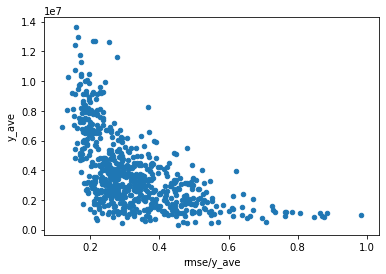

In [10]:
aa = actual[['tid','rmse','y_ave']].drop_duplicates()
aa['rmse/y_ave'] = aa.rmse/aa.y_ave
aa.plot.scatter(x='rmse/y_ave',y='y_ave')

In [11]:
aa

,tid,rmse,y_ave,rmse/y_ave
0,91010033,539691.57,775018.52,0.70
351,91010053,629663.61,1317805.70,0.48
702,91010068,126519.40,435776.64,0.29
1053,91010075,430089.65,1850089.74,0.23
1404,91010090,884660.94,1571871.23,0.56
...,...,...,...,...
229203,BR987,546390.25,2465162.68,0.22
229554,BR988,915307.40,3328672.36,0.27
229905,BR992,1919564.69,6696398.29,0.29
230256,BR996,2654038.19,12721502.56,0.21


In [12]:
aa.sort_values('rmse/y_ave',ascending=False)

,tid,rmse,y_ave,rmse/y_ave
75114,91018953,969917.94,985071.23,0.98
17550,91016261,1008133.87,1138152.71,0.89
66339,91018354,757835.78,865693.73,0.88
63882,91018288,806584.65,926461.54,0.87
67392,91018361,952804.00,1101035.33,0.87
...,...,...,...,...
192699,BR626,1211747.31,8127103.42,0.15
198666,BR671,1336666.78,9177893.45,0.15
117936,BR077,1389739.95,10238066.10,0.14
157599,BR389,1067824.11,8037149.86,0.13


In [13]:
actual['date'] = pd.to_datetime(actual.pred_date)

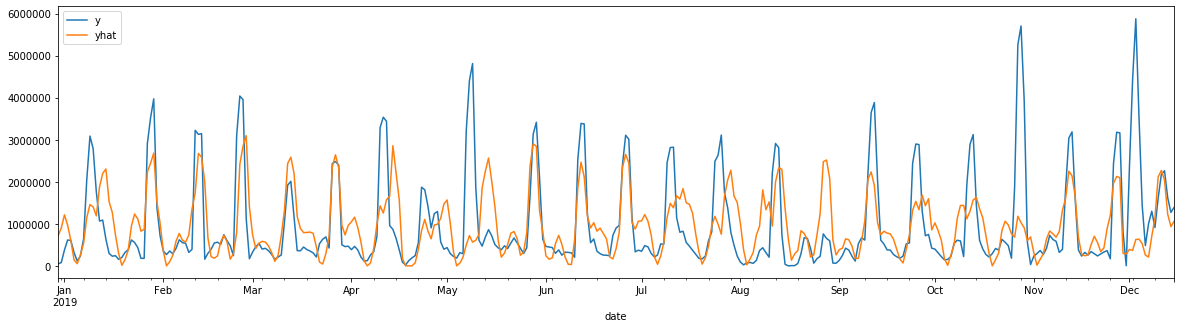

In [14]:
actual[actual.tid == 91018953].set_index('date')[['y','yhat']].plot(figsize=(20,5))

### Forecast 2019